In [1]:
%load_ext autoreload
%autoreload 2

# Unconditional quantum teleportation between distant solid-state quantum bits

<center><img src="figure_0.png"/></center>

2021-04-05 21:21:02,218 - qm - INFO - Performing health check
2021-04-05 21:21:02,225 - qm - INFO - Health check passed
2021-04-05 21:21:02,307 - qm - INFO - Performing health check
2021-04-05 21:21:02,314 - qm - INFO - Health check passed
2021-04-05 21:21:02,351 - qm - INFO - to simulate a program, use QuantumMachinesManager.simulate(..)
2021-04-05 21:21:02,376 - qm - INFO - Flags: 
2021-04-05 21:21:02,378 - qm - INFO - Simulating Qua program
2021-04-05 21:21:02,875 - qm - WARNING - pulse 'zeroPulse' used in play is not part of element 'a-reset' operations
2021-04-05 21:21:02,877 - qm - WARNING - pulse 'zeroPulse' used in play is not part of element 'a-ro' operations


KeyError: 0

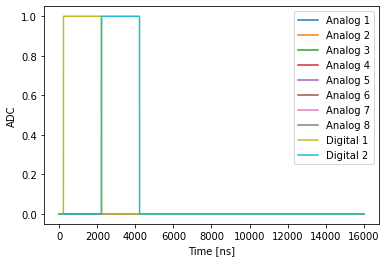

In [8]:
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.qua import *
from qm import SimulationConfig
from Configuration import config

import matplotlib.pyplot as plt


Qmm = QuantumMachinesManager()
Qmm.close_all_quantum_machines()
qm = Qmm.open_qm(config)

with program() as prog:
    play("zeroPulse", "a-reset",duration=500)
    wait(500,"a-ro")
    play("zeroPulse", "a-ro",duration=500)

    QMm = QuantumMachinesManager()
QMm.close_all_quantum_machines()

QM1 = QMm.open_qm(config)
job = QM1.simulate(prog, SimulationConfig(int(4000)))  # in clock cycles, 4 ns

samples = job.get_simulated_samples()
samples.con1.plot()
samples.con1.analog[0]

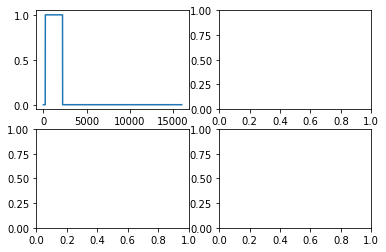

In [15]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(samples.con1.digital['1'])
axs[0,0].plot(samples.con1.digital['2'])